# Predicting the Early Stages of Alzheimer's Disease to Potentially
# Prevent or Delay the Development of Dementia - Part 2

## Utilising the Multi-Class, Single Label, CNN (Convolutional Neural Networks) Versus  DCGAN (Generative Model) Architecture 



## 1. Introduction
Alzheimer’s disease (AD) is the most common cause of dementia. Dementia is the name for a set of symptoms that includes memory loss and difficulties with thinking, problem-solving or language. Dementia develops when the brain is damaged by diseases, including AD. It's a physical disease that affects the brain. It is named after Alois Alzheimer, the doctor who first described it.

The brain is made up of billions of nerve cells that connect to each other. In AD, connections between these cells are lost. This is because proteins build up and form abnormal structures called ‘plaques’ and ‘tangles’. Eventually nerve cells die and brain tissue is lost.

The brain also contains important chemicals that help to send signals between cells. People with Alzheimer’s have less of some of these ‘chemical messengers’ in their brain, so the signals are not passed on as well. There are some drug treatments for Alzheimer’s disease that can help boost the levels of some chemical messengers in the brain. This can help with some of the symptoms.

Alzheimer’s is a progressive disease. This means that gradually, over time, more parts of the brain are damaged. As this happens, more symptoms develop, and they also get worse. More than 520,000 people in the UK have dementia caused by AD and this figure is set to rise [1].

Currently, there is no effective cure for AD, but its progression can be delayed with some treatments, like the drug treatments mentioned above or clinical diagnosis mentioned in Section 2 below. Accurate and early diagnosis of AD is vital for the patient care and development of future treatment.

Thus, there is a need for automatic diagnosis of certain diseases from medical images that could help medical practitioners for further assessment towards treating the illness. AD is a good example of a disease that is often misdiagnosed. And AD is caused by atrophy of certain brain regions and by brain cell death. Magnetic Resonance Imaging (MRI) scans reveal this information but atrophied regions are different for different individuals which makes the diagnosis a bit more trickier and often gets misdiagnosed [2].



## 2. Objectives

**Clinical Diagnosis of Alzheimers Disease**

As stated previously, although no disease-modifying agents are capable of reversing the initial pathological changes are currently available, it may be possible to prevent or delay the development of dementia in a proportion of the population by modifying exposure to common risk factors. In other individuals, diagnosing the disease or risk of disease early is still valuable so that the individual and their carers have time to make choices and plan for the future, and to allow access to treatments that can help manage symptoms.

The positive benefits of receiving an early Alzheimer’s disease diagnosis to the patient are that it provides an explanation for the symptoms and signs they are experiencing and puts an end to their suspicions. An early diagnosis and subsequent access to the right services and support can help people take control of their condition, live independently in their own home for longer, and maintain a good quality of life for themselves, their family and carers [3].

**Magnetic Resonance Imaging (MRI) in the Diagnosis and Prognosis of Alzheimers Disease**

The uncertainty inherent in a clinical diagnosis of AD has driven a search for diagnostic imaging markers.  An obvious strength of MRI is its availability. A testament to its value in diagnosis in dementia is the fact that European and U.S. guidelines recommend that all subjects with cognitive decline undergo structural imaging (MRI or CT) and that it is part of proposed diagnostic criteria for AD and for other dementias. In most centers, MRI is regarded as an essential investigation in dementia — a marker of its utility.

MRI is safe and as it does not involve ionizing radiation individuals can be imaged serially without concerns about carcinogenicity. MRI offers a range of different sequences that can probe different tissue characteristics providing multiple clinical and research measures in the same session. Atrophy as an outcome measure has strengths over clinical measures because it is not subject to practice effects or (realistically) to floor or ceiling effects, and it theoretically has a greater ability to detect disease slowing [4].

Among several deep-learning techniques that have been applied to assessing structural brain changes on MRI is the convolutional neural network (CNN). This has gained popularity due to its superb efficiency in automated feature learning with the use of a variety of multilayer perceptrons [5].

An Alzheimer's MRI produces 3D imaging of the hippocampus, clearly showing how many cells are present and how big it is. The Alzheimer's Disease Brain Comparison is illustrated below [6]:

![title](alzheimers_disease_brain_comparison.png)

Therefore, having a deep learning model that detects AD in the early stages can allow longer life expactancy from the patient as well as higher life quality overall from the slowdown of dementia.

Thus, our objective is to:

To provide a complete pipeline to develop a deep learning model. More specifically, deep learning for computer vision (2D).  Using a multiclass image classification (single label) deep learning model that can predict what stage (refer below) of Alzheimer's a patient is, from their MRI image:

- Mild Demented 

- Moderate Demented

- Non Demented

- Very Mild Demented

This study will focus on CNN (Convolutional Neural Networks), as the preferred deep learning method and architecture. We'll also trial a DCGAN network.


## 3. Dataset

The dataset was retrieved from Kaggle [7]. A platform which allows users to source their data sets and explore/ build upon them (license or rules permitting). The Alzheimers Dataset contains 4 classes of MRI images:

- Class 1: Mild Demented (896 Images)
- Class 2: Moderate Demented (64 Images)
- Class 3: Non Demented (3200 Images)
- Class 4: Very Mild Demented (2240 Images)

The original source of the data is not known, it was hand collected from various websites with each and every label verified. It provides 6400 MRI images, in .jpeg format.  This is considered a small dataset i.e. few hundreds to a few tens of thousands of images.

The data has been released under the Apache 2.0 open source license, the total size of the files are 29MB and all the images are resized to 128 x 128 pixels. 

To summarize, this dataset has a usuability score of 8.75. Hence, it's easy enough to intepret and well documented. After some research, it is evident this is a good quality data set for the topic of implementing a neural network model (incorporating CNN and dropout layers), to predict one of the four stages of alzheimers disease, using MRI scans of the brain.

Although we'll use this dataset from Kaggle, we'll use the pre-processed/ balanced (SMOTE) output from Part 1.  There are 12,800 images in the SMOTE dataset. SMOTE adds data which helps the model to learn better, however, more data requires more RAM. And since CNN architecture is more computationally expensive (compared to dense layers), it may prove more challenging to execute on the free cloud infrastructure i.e. Google Colab or Kaggle.

Techniques, insights, rational and caveats behind the code are presented with Python comments and individual summaries below.


## 4. Evaluation Methodology (Choosing a Measure of Success)

In Deep Learning, our goal is to achieve a deep learning model that generalizes well on new unseen data or unknown data.

While evaluating a model we always split our data into three sets: training, validation and test set. 

1. Training Data: Train with this set
2. Validation Data: Perform evaluation with this set, to reduce overfitting
3. Test Data: Perform the final test with this set

We tune the parameters of the model according to the validation loss and validation accuracy. And we repeat this process until we get the model that best fits on the validation set. And after choosing the best model, we test or confirm our results on the testing set to get the correct accuracy, or how well our model is generalised.

While developing a model, we tune the parameters of the model, whether they're hyperparameters or network’s weights. We perform this tuning, receiving the feedback signal on the performance of the model, on validation data. Tuning is a form of learning. When we, repeatedly, tune the model on the basis of the validation set, it starts leaking the information. Finally, we’ll end up with a model that performs artificially well on the validation data, which we optimized for. Now we measure the performance of our model on completely new data called test data, which tells us how well our model is generalised [11].
   

![title](model_evaluation.png)


## 5. Deciding on an Evaluation Protocol

We must establish how we'll measure current progress. We can choose from one of the three options below:

1. Maintaining a hold-out validation set: The way to go when we have plenty of data

2. Performing K-fold cross-validation: The correct choice when we have too few samples for hold-out validation to be reliable

3. Performing iterated K-fold validation: For performing highly accurate model evaluation when little data is available

Hold-out validation appears to be the best evaluation protocol, as we have 12,800 images to work with and we'll evaluate on the unseen data/ hold out set.

## 6. Data Preprocessing

As we're using a 3rd party dataset, the import procedure (and code) is slighlty different from the procedure used by the default tf.keras.datasets module, for toy datasets. Hence, we require to mount the Gdrive and unzip our folders. 

We also need to split the four folders of files (e.g. images) into train, validation and test (dataset) folders.

Please note, the concepts from Topic 5, 'Deep Learning with Python' from F. Chollet have been summarised. And the code has been slightly modified to function with our 3rd party dataset.


In [4]:
#*************************************************************#
                         #Import Libraries#
#*************************************************************#

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt, seaborn as sb
import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt

#for deep learning

#the ImageDataGenerator class in keras provides a suite of techniques for scaling pixel values
#in our image dataset prior to modeling. Imports data with labels easily into model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import models #required to run CNN
from tensorflow.keras import optimizers
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping

#for evaluation
from sklearn.metrics import f1_score

In [5]:
#Refer to reference 10, for code and background
#The ImageDataGenerator class allows the model to receive new variations of the images at
#each epoch

#The dataset is now split between a training, test and validation set  

train_datagen = ImageDataGenerator(
      rescale=1./255)

# Note that the validation data should not be augmented! Refer to Section 3 above for background
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory, pre-processed MRI images from coursework 1 stored in this location 
        "/kaggle/input/smote-ds/new_output/train/",
        # All images will be resized to 128x128
        target_size=(128, 128),
        batch_size=20,
        # Since we have four output labels, we use categorical_crossentropy loss
        class_mode='categorical',color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
        "/kaggle/input/smote-ds/new_output/val/",
        target_size=(128, 128),
        batch_size=20,
        class_mode='categorical',color_mode='grayscale')

Found 10240 images belonging to 4 classes.
Found 1280 images belonging to 4 classes.


**Pre-Processing Summary**

To reiterate, we're using the pre-processed dataset from Part 1.  Hence, data is already represented as tensors, labels are already encoded to categorical, data is rescaled from above, already rebalanced using SMOTE, and no feature engineering is required.

## 7. Baseline Performance

A baseline is a model that should be both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementation is widely available in popular packages.

Our goal is to achieve statistical power, to develop a small model that is capable of beating a dumb baseline i.e for image classification (such as the MNIST digit dataset), anything that achieves an accuracy greater than 0.1 can be said to have statistical power.

We could benchmark against the performance of our sequential dense network in Part 1. However, the architecture is different. So, we'll build a new network below, albeit a smaller, less complex one.

The three key choices to build the first working model are [12]:

- Last layer activation: This establishes useful constraints on the networks output.  It depends on the problem type. Softmax function returns the probabilty of each class, and is frequently used as an activation function for the last layer of a neural network dealing with a multi-class model

- Loss function: This should match the type of problem we're trying to resolve. We have used categorical cross entropy due to utilising one hot encoded labels .This has no effect on model performance. Model performance will be the same in both cases if data is represented as integers or one hot encoded.

- Optimization configuration: What optimizer shall we use and what is it's learning rate? For baseline models, it's safe to go with rmsprop and it's default learning rate. 


In [12]:
#baseline - building the network
#Convnets also contain pooling layers. They are usually used immediately after convolutional 
#layers and simplify the information from the preceding convolutional layer 
#a pooling layer also prepares a condensed feature map

model = models.Sequential()#create empty network object. sequential means the network is a 
#series of transformational layers 
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)))#re shape of 
#1st layer, we know the MRI images are resized to 128 x 128 pixels. They're also grayscale, 
#hence one channel 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))


In [13]:
#A stack of 'Conv2D' and 'MaxPooling2D' layers - explanation to follow. A convnet accepts 
#input tensors of shape (excluding the batch dimension).(image_height, image_width, 
#image_channels)

#Output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels).
#The width and height dimensions reduce along the processing pipeline
#Conv layer parameters: model.add(layers.Conv2D(64, (3, 3), activation='relu')). 64 channels, 
#a 3 x 3 patch (local receptive field),relu activation

#The output tensor (of shape (28, 28, 64)) must be fed into a densely-connected classifier. 
#Dense layer classifiers process 1D vectors - convnet output is a 3D tensor

#The activation of the layer is ready. The output tensor of shape (28, 28, 64) must be fed 
#eventually into a densely connected classifier. We know that the dense layer classifiers 
#process 1D vectors, however, the convnet output is a 3D tensor so we have a mismatch. 

#The solution is very simple. We require to flatten our 3d output to a one-dimensional vector,
#and then add a few dense layers on top: Model.add( layers.flatten), will flatten our tensor 
#into 1D. Then we add a 64 unit dense layer and then finally a 4 unit dense layer, because 
#there are 4 output classes.

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [14]:
#We require to flatten our 3D output to 1D, and then add a few Dense layers on top:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [15]:
#Revised model summary - can review how the dimensions of the feature maps change with every 
#successive layer

#Below is the summary of the model and we end up with just over 3.2 Million trainable parameters.
#The (28, 28, 64) convnet output is flattened into a 50176 length vector. That 50176, is 28 
#times 28 for the patch size, and there are 64 channels, hence 28 times 28 times 64 is 50176. 
#Then it's  passed into two Dense layers

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

In [16]:
#baseline - compiling the model

model.compile(optimizer='rmsprop', #the optimizer (all sgd variants) makes parameter adjustments (layers, weights and biases) in the training loop and metrics reports on progress
              loss='categorical_crossentropy',#how far off the network prediction is from the target/ quantifies performance
              metrics=['accuracy'])#is the fraction of correctly classified samples

#'sparse' categorical crossentropy is used when classes are represented as integers 1,2,3,4 etc
#only categorical crossentropy is used when classes are one hot encoded i.e. 0100, 0001 and 
#so forth, such as our dataset


In [17]:
#baseline - training the network

#history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=80, verbose=1)#callbacks=callback

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=2, 
                              verbose=1)

Epoch 1/2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


512/512 [==============================] - 90s 175ms/step - loss: 0.7307 - accuracy: 0.6745 - val_loss: 0.4035 - val_accuracy: 0.8172
Epoch 2/2
512/512 [==============================] - 89s 174ms/step - loss: 0.1883 - accuracy: 0.9280 - val_loss: 0.1609 - val_accuracy: 0.9336


**Baseline Model Summary**

From the output/execution of the above, our network is producing a training accuracy of 0.9280 and a validation accuracy of 0.9336.  This is way above the expected default of 0.1 for image classification, which is positive.  It also outperforms our dense layer model from Part 1, which had a training accuracy of 0.6514 and a validation accuracy of 0.6301. 

This is because CNN's are very different from the default feedforward NN's.  CNN's use kernals that seek for features on a different part of an image. Applying this kernal to different parts of an image lets us discover the same patterns on different parts of an image. Hence, they provide a better evaluation.

We're also using a smaller model here i.e. less layers, which deems it less complex.

Finally, this baseline helps us decide on a modelling strategy for a CNN network. However, as it's performance is slightly weaker, we have built a more complex, robust model in section 8 below.


## 8. Scaling Up - Developing a Model that Overfits

To improve our model's accuracy (for faster training), for predicting the stage of Alzheimers, we can now build a more complex network and train it on our data set. There are three scaling dimensions of a CNN:

- Depth. How deep the network is, which is equivalent to the number of layers in it
- Width. How wide the network is i.e. number of channels in a Conv layer
- Resolution. The image resolution being passed on to a CNN. 


#### Building the Network

The first line in our code below, creates a Sequential model and this is the simplest type of data structure in Keras and is basically a sequence of connected layers in a network.

Our network has a depth of 11 layers.

#### Compiling the Model

The loss function: In our case we are using categorical cross entropy — use this loss function when our classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and categorical crossentropy when one sample can have multiple classes or labels are soft probabilities (like [0.5, 0.3, 0.2]).

The optimizer: we are going to use to optimise the model against the loss function is stochastic gradient descent and this will ensure the model converges on an optimum solution i.e. Keras will use the backpropagation method described above.

Finally, we specify a metric that we are going to use in addition to loss to give us an idea of how well our model is working. In this case, we are using accuracy which gives an idea of how well our model is doing by giving a percentage of how many predictions match the actual class for the model we are training.

#### Training the Network

We initially pass in the images that we want to train the network on. We also specify the number of epochs we want to train the model with (an epoch being defined as how many times we want to pass the training data through the network for training purposes).

Keras also lets us specify an optional argument, where we pass in a validation data set. If we do this, then at the end of each epoch Keras will test the performance of the network on the validation data set. This is a good way of ensuring the model isn’t overfitting, however, it doesn’t feed into the training itself [8]


In [18]:
#*************************************************************#
                         #Building the Network#
#*************************************************************#

#Our convnet will be a stack of alternating Conv2D (with relu activation) and MaxPooling2D 
#layers. One more Conv2D + MaxPooling2D stage; augments the capacity of the network and 
#reduces the size of the feature maps so that they too large when we reach the Flatten layer

#We have more layers in our bigger model i.e. 11 layers

#Hence, this model is more than capable of overfitting

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))



In [19]:
#128 x 128 MRI image input size is reduced to 6 x 6

#The depth of the feature maps (number of channels/filters per layer) progressively increases 
#(from 32 to 128) the size of the feature maps decreases (from 126 x 126 to 6 x 6)

#Increasing depth and decreasing feature size is a common convnet architectural pattern

#Multi classification problem - the network ends in a single softmax unit and assigns decimal 
#probabilities to each class in a multi-class problem 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

In [20]:
#*************************************************************#
                         #Compiling the Model#
#*************************************************************#

#The training specification is made at compilation
#The optimizer, loss function, and a monitoring metric are specified when the network is 
#compiled.

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#categorical crossentropy is the preferred loss for problems in which each sample belongs to 
#one of several classes many optimizers attempt to avoid the local optimum problem by employing
#momentum. 



In [21]:
#*************************************************************#
                         #Training the Network#
#*************************************************************#

#Train the model for 20 epochs with the Keras Model.fit method:

#there are accuracy and loss metrics for both the training and validation data sets. the value
#of the accuracy is a simple percentage measure of how many items the network got right. the 
#value of loss is the cross entropy loss.

#an epoch is a complete iteration over the entire training set. the loss is minimized by 
#mini-batch stochastic gradient descent, also known as SGD. weights and biases are adjusted 
#after each mini-batch has been processed

#The generators yield batches of 128 x 128 grayscale images (shape (20, 128, 128, 1)) and 
#multi-class labels (shape (20,))

#model.fit() will accept training and validation generators
#fit needs to know how many samples to draw before declaring an epoch over (because the data 
#is being generated endlessly). The epochs are controlled by the steps_per_epoch parameter

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=20, 
                              verbose=1)


Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


512/512 [==============================] - 102s 197ms/step - loss: 0.8790 - accuracy: 0.5754 - val_loss: 0.4927 - val_accuracy: 0.7852
Epoch 2/20
512/512 [==============================] - 101s 197ms/step - loss: 0.3493 - accuracy: 0.8548 - val_loss: 0.2359 - val_accuracy: 0.8906
Epoch 3/20
512/512 [==============================] - 101s 197ms/step - loss: 0.1618 - accuracy: 0.9403 - val_loss: 0.2135 - val_accuracy: 0.9062
Epoch 4/20
512/512 [==============================] - 101s 197ms/step - loss: 0.0836 - accuracy: 0.9718 - val_loss: 0.0999 - val_accuracy: 0.9633
Epoch 5/20
512/512 [==============================] - 102s 198ms/step - loss: 0.0604 - accuracy: 0.9798 - val_loss: 0.1813 - val_accuracy: 0.9422
Epoch 6/20
512/512 [==============================] - 100s 196ms/step - loss: 0.0495 - accuracy: 0.9857 - val_loss: 0.0557 - val_accuracy: 0.9805
Epoch 7/20
512/512 [==============================] - 100s 196ms/step - loss: 0.0446 - accuracy: 0.9869 - val_loss: 0.1902 - val_accura

In [22]:
#let's save the model

model.save('predict_alzheimers_disease_using_CNN.h5')

In [23]:
#load the model

model=keras.models.load_model('predict_alzheimers_disease_using_CNN.h5')

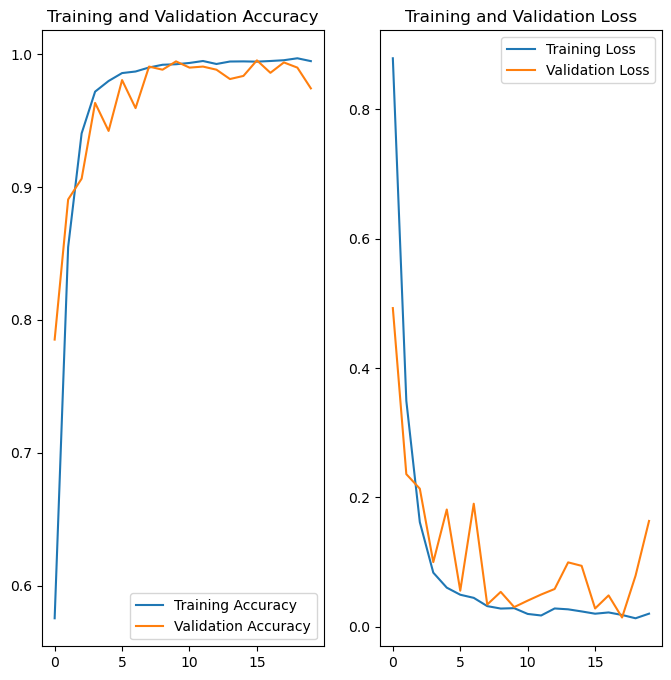

In [24]:
#******************************************************************#
#Visualise Results with Training and Validation Accuracy/Loss Plots#
#******************************************************************#

#once the model is trained, it is possible to call its history method to get a dictionary of 
#the loss and any other metrics needed at every stage of the training

#as we see from the "Training and Validation Accuracy" plots below, training accuracy is 
#only lightly greater than validation accuracy, with exception of the first 10 epochs, 
#(which are stabilizing) hence the result of these initial 10 epochs do not express the network 
#state very well 



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [25]:
#*************************************************************#
                 #Overfitted Model Summary#
#*************************************************************#

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)     

**Overfitted Model Summary**

As we see from the "Training and Validation Accuracy" plots above, training accuracy is greater than validation accuracy, from around 6 epochs onwards. 

We could possibly train this model longer as it doesn’t look like the loss has reached an absolute minimum.

This is the outcome, as the model can't generalize well. Such models could mitigate overfitting with addition of dropout, which we'll demonstrate below.

This means that the model will have a difficult time generalizing on a new dataset, hence we can't evaluate on the test set, just yet. Hence, we now require to increase the overall performance of the model.

Finally, it can be seen from the plots and the output from training the network, that the overfitted model accuracy is better than our baseline i.e. 0.9742 verus 0.9336. However, as stated above, we now require to deal with the overfitting issue in section 9 below.

## 9. Tuning and Regularization

#### Tuning
We can use a pre-trained convnet, known as transfer learning. Our model uses the knowledge learned from a previous assignment (VGG16) to increase prediction about our task. There are two ways to deploy this pre-trained network; fine tuning and feature extraction.

a) Fine-tune upper pretrained layers for better performance.

Steps for fine-tuning a network:

- Add the custom network on top of the pretrained base
- Freeze the base
- Train the custom network
- Unfreeze some base layers
- Jointly train these layers and the custom network

b) Feature extraction means using the learned representations of trained networks to find relevant features in new datasets. We're going to extract the features from this pre-trained convnet for image retrieval [10]

### Dropout (Regularization Techniques)
This is considered a small dataset (refer to Section 3 - Dataset). And overfitting is caused by having few too training samples. Overfitting means the model fits ever more closely to the specific patterns of the training set, but the model fails to generalize. The best solution is to find more training data (infinite data to be precise), but data is often limited, especially in the medical field. Hence, we have to regularize.

Techniques to reduce overfitting are; network size reduction, dropout, weight decay (L2 regularization) and data augmentation. We'll focus on dropout for Coursework 2.

Data augmentation (often used in computer vision) is suited in our case, where we artificially generate more training data from the existing data. However, in our case, we've already applied SMOTE from the previous coursework, so it's too computationally expensive to apply here.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer

Dropout is removed while evaluating the final network. The output layers of the final network need to be scaled downby the dropout rate because one-half of the layer outputwas effectively removed during training. Desired outputs will be twice as large when the network is restored to its full size and applies the test set. [9]

In [26]:
#••••Add Dropout***

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #additional dropout layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

#We also adjust learning rate this time. Tweak layer parameters, as the 
#smaller learning rate may allow our model to learn a globally optimal set of weights. 
#Caveat is, model will be longer to train

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),#better learning rate 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)     

In [28]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=20, 
                              verbose=1)

Epoch 1/20


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


512/512 [==============================] - 102s 197ms/step - loss: 0.9855 - accuracy: 0.5243 - val_loss: 0.6016 - val_accuracy: 0.7023
Epoch 2/20
512/512 [==============================] - 100s 195ms/step - loss: 0.5590 - accuracy: 0.7482 - val_loss: 0.4625 - val_accuracy: 0.7867
Epoch 3/20
512/512 [==============================] - 100s 195ms/step - loss: 0.3667 - accuracy: 0.8416 - val_loss: 0.2164 - val_accuracy: 0.9242
Epoch 4/20
512/512 [==============================] - 100s 195ms/step - loss: 0.2552 - accuracy: 0.8970 - val_loss: 0.1751 - val_accuracy: 0.9211
Epoch 5/20
512/512 [==============================] - 100s 196ms/step - loss: 0.1822 - accuracy: 0.9277 - val_loss: 0.0917 - val_accuracy: 0.9656
Epoch 6/20
512/512 [==============================] - 100s 195ms/step - loss: 0.1530 - accuracy: 0.9429 - val_loss: 0.1067 - val_accuracy: 0.9547
Epoch 7/20
512/512 [==============================] - 100s 195ms/step - loss: 0.1190 - accuracy: 0.9578 - val_loss: 0.0479 - val_accura

In [60]:
#Let's save our model -- we'll be using it later for convnet visualization

model.save('predict_alzheimers_disease_using_CNN2.h5')


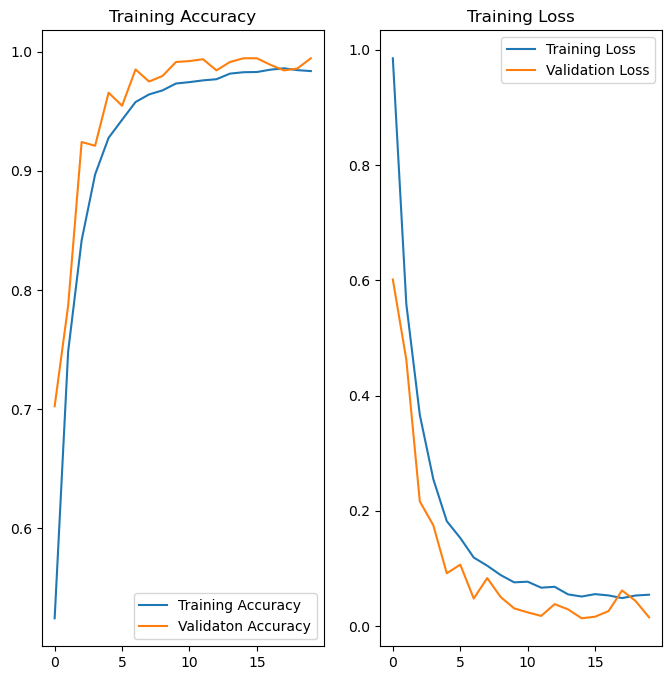

In [29]:
#*******************************************************************************************************#
#Visualise Results with Training and Validation Accuracy/Loss Plots - Post Dropout#
#*******************************************************************************************************#

#This time, the validation curve is outperforming the training curve. 
#Dropout seems to have made an immediate impact and prevented overfitting in this case
#The better learning rate has potentially attributed to the enhanced validation accuracy

#Other regularisation techniques and hyper-parameter tuning can push the accuracy higher by a 
#few per cent. However, the ultimate potential in training our own model from scratch is 
#limited because of the insuffient training data
#Pretrained Convnets shows how models that have been trained on different, larger, datasets, 
#can be applied to the small-data problem - see next code cell below

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validaton Accuracy')

plt.legend(loc='lower right')
plt.title('Training Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [25]:
#****Using a pretrained convnet****

#A pretrained network is simply a network that has been trained on a large dataset - typically,
#a large-scale image classification task - and saved for public use

#Philosophy: the pre-trained model, if it has been trained on a large and sufficiently general 
#dataset, will have learned the spatial feature hierarchy of real-world objects
#(edges and corners, simple shapes, compound shapes)

#Such a pretrained model would prove useful for many different computer vision problems - 
#even for completely different classes from those of the original task
#For example, train a network on a dataset where the classes are mostly animals and everyday 
#objects and apply this trained network to identifying furniture

#The ability of DL models to solve new, unseen problems distinguishes DL from older, shallow 
#learning techniques and it makes DL very effective for small-data problems

#tensorflow.keras has several pretrained models - they have all been trained on ImageNet :

# - Xception
# - InceptionV3
# - ResNet50
# - VGG16
# - VGG19
# - MobileNet

#We'll use the VGG16 architecture. It is a simple and widely used convnet architecture for 
#ImageNet. VGG16 is not necessarily the lightest and best pretrained model, 
#but the architecture is similar to our previous convnets


In [30]:
#*************************************************************#
                         #Feature Extraction#
#*************************************************************#

#There are two ways to deploy a pre-trained network: feature extraction and fine-tuning

#We start with feature extraction. Feature extraction means using the learned representations 
#of trained networks to find relevant features in new datasets

#Convnets are built in two parts: a convolutional base of pooling and conv layers 
#densely-connected classifier

#The base weights and biases are 'frozen' - held fixed - and the original classifier is 
#replaced with a new classifier that is more appropriate to the task in hand
#The trained conv base extracts features;  the new classifier is trained to interpret these 
#features in terms of the new classes

#Why only reuse the convolutional base? Why not use the densely-connected classifier as well?
#Because representations learned by the convolutional base are likely to be generic; 
#those learned by the classifier are specific and non-spatial

#Convnet feature maps represent generic concepts (edges, corners, objects etc) - concepts that 
#will apply to many real-world images

#But representations learned by the pretrained classifier will be very specific to the classes 
#of the original training set

#Convolutional layers preserve object location; densely-connected layers lose spatial 
#information. The loss of spatial information might be problematic for some tasks
#=> disconnect pretrained classifier

#The generality (and thereforereusability ) of the representations extracted by specific 
#convolution layers depends on the depth of the layer in the model

#early, lower, layers extract local, highly generic feature (such as visual edges, colors, and 
#textures) higher layers extract more abstract concepts 
#use the lower layers only, and not the entire base, for datasets that differ markedly from 
#the original dataset of the trained model

#The constructor takes three arguments:
#weights, either none, imagenet or a path to a weights file
#include_top for possible retention of the three layer densely-connected 1000 class classifier
#input_shape, shape of input image tensor

from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))


58889256/58889256 [==============================] - 3s 0us/step


In [31]:
#detail of the architecture of the VGG16 convolutional base: very similar to simple convnets

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [32]:
#The densely-connected classifier must accept the (4, 4, 512) output of the final feature map 
#(seen in the above output)

# 1. Extract then train 
#run the convolutional base over MRI dataset and save output as a Numpy array
#use the processed features as input to a standalone densely-connected classifier
#Similar to training a classifier on a set of 4 x 4 'images' of 512 channels 

#Extract-then-train is very fast because it only requires running the convolutional base once 
#for every input image (the convolutional base is by far the most expensive part of the 
#pipeline). But this technique would prohibit data augmentation

# 2. Extract and train
#add Dense layers on top of conv_base
#running the whole thing end-to-end on the input data
#Every input image is going through the convolutional base every time it is seen by the model 
#- so we can use data augmentation
#But this technique is computationally intense

#Let's look at option 1 (recording the outputs of conv_base on our data and using these outputs 
#as inputs to a new model)
#extract features by calling the predict method of conv_base
#define a dense classifier and train on the extracted features

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir ="/kaggle/input/smote-ds/new_output/" #  dataset_path 

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,4))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [33]:
train_features, train_labels = extract_features(train_dir, 10240)#10240 training images found
validation_features, validation_labels = extract_features(validation_dir, 1280)#1280 validation images found
test_features, test_labels = extract_features(test_dir, 1280)

Found 10240 images belonging to 4 classes.
1/1 [==============================] - 1s 567ms/step
Found 1280 images belonging to 4 classes.
1/1 [==============================] - 1s 564ms/step
Found 1280 images belonging to 4 classes.
1/1 [==============================] - 1s 586ms/step


In [34]:
#The extracted features are currently of shape (samples, 4, 4, 512)
#Flatten to (samples, 8192) ready for input to a dense classifier

train_features = np.reshape(train_features, (10240, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1280, 4 * 4 * 512))
test_features = np.reshape(test_features, (1280, 4 * 4 * 512))

In [41]:
#Define the densely-connected classifier (with dropout for regularisation) and train it on the 
#recorded data and labels:

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=80,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/80


2023-02-26 11:35:47.448467: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 335544320 exceeds 10% of free system memory.


512/512 [==============================] - 5s 9ms/step - loss: 1.1975 - acc: 0.4479 - val_loss: 0.8384 - val_acc: 0.6187
Epoch 2/80
512/512 [==============================] - 4s 9ms/step - loss: 0.8940 - acc: 0.5679 - val_loss: 0.7452 - val_acc: 0.6391
Epoch 3/80
512/512 [==============================] - 4s 9ms/step - loss: 0.8369 - acc: 0.5911 - val_loss: 0.6888 - val_acc: 0.6797
Epoch 4/80
512/512 [==============================] - 4s 9ms/step - loss: 0.7979 - acc: 0.6179 - val_loss: 0.6127 - val_acc: 0.7188
Epoch 5/80
512/512 [==============================] - 4s 8ms/step - loss: 0.7751 - acc: 0.6268 - val_loss: 0.6146 - val_acc: 0.7234
Epoch 6/80
512/512 [==============================] - 4s 9ms/step - loss: 0.7612 - acc: 0.6297 - val_loss: 0.5937 - val_acc: 0.7234
Epoch 7/80
512/512 [==============================] - 4s 8ms/step - loss: 0.7332 - acc: 0.6518 - val_loss: 0.6088 - val_acc: 0.7172
Epoch 8/80
512/512 [==============================] - 4s 8ms/step - loss: 0.7196 - acc:

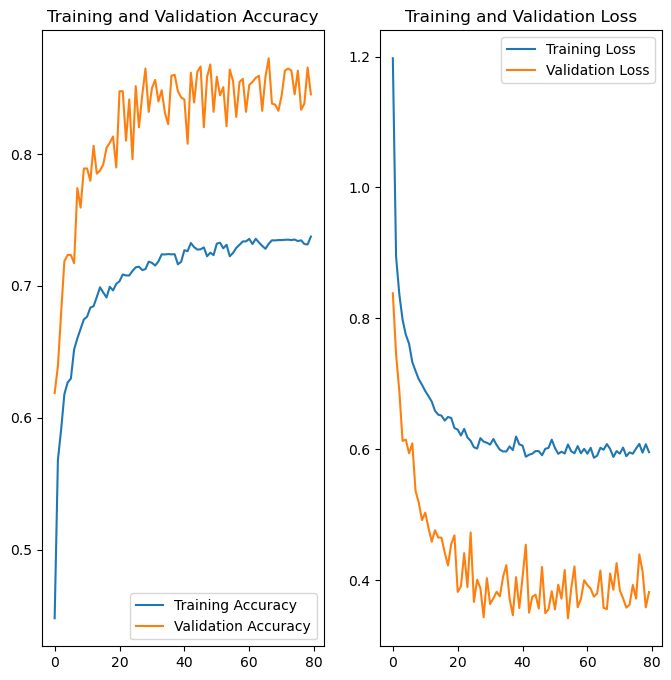

In [42]:
#Training is very fast since there are only two Dense layers

#Now, inspect training loss and accuracy:

#We attain about 0.8453 validation accuracy. which is worse than our baseline.
#However, the plots indicate generalization (validation is more accurate than training) 
#The 50% dropout, and using this pre-trained convnet with Feature Extraction (Option 1) has been positive 

#Generator driven data augmentation is impossible with option 1 and data augmentation is essential
#for preventing overfitting with small image datasets

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
# Now we should load RGB images instead of grayscale  
#",color_mode='grayscale'" is not needed any more
train_datagen = ImageDataGenerator(
      rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        "/kaggle/input/smote-ds/new_output/train/",
        # All images will be resized to 128x128
        target_size=(128, 128),
        batch_size=20,
        
        class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
        "/kaggle/input/smote-ds/new_output/val/",
        target_size=(128, 128),
        batch_size=20,
        class_mode='categorical')

Found 10240 images belonging to 4 classes.
Found 1280 images belonging to 4 classes.


In [44]:
##So let's now consider Option 2 (extract and train)
#add a classifier to the conv_base model
#train the entire model on the data-augmented inputs

#This technique is very expensive (about 5 mins/epoch on a cpu) - you should consider using a 
#GPU, or even a TPU. GPU and TPU runtimes are available at Google Colaboratory
#We're using Kaggle platform, with the GPU Nvidia Tesla P100 option

#tensorflow.keras presents a common interface for models and layers - models can be clicked 
#into place as if they were layers

#Simple add conv_base to a Sequential model:

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [45]:
#14.7 million parameters in the convolutional base and 20+ million dense classifier parameters. 
#Hence,this is a complex model and would prove computationly expensive to train

#The Dense layers on top are randomly initialized; very large weight updates would be 
#propagated through the network, effectively destroying the previously learned representations 
#of the conv base

#Solution: 'freeze' the convolutional base. A layer is 'frozen' if its weights cannot be 
#updated during training. Model or layer trainable attribute to False. Freezing must take 
#place before compilation

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               2097408   
                                                                 
 dense_19 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 16,813,124
Trainable params: 16,813,124
Non-trainable params: 0
_________________________________________________________________


In [46]:
#VGG16 has 2 conv layers and each layer has a main weight tensor ( 𝑤 ) and a bias tensor ( 𝑏 )
#The dense classifier has two trainable layers - that's four more tensors of trainable parameters
#30 tensors of trainable parameters before freezing

print('Trainable parameter tensors before freezing the conv base:', len(model.trainable_weights))

Trainable parameter tensors before freezing the conv base: 30


In [47]:
conv_base.trainable = False

In [48]:
#4 tensors after freezing

print('Trainable parameter tensors after freezing the conv base:', len(model.trainable_weights))

Trainable parameter tensors after freezing the conv base: 4


In [49]:
#Train network after option 2, Extract and Train

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      epochs=30,
      validation_data=validation_generator
)

Epoch 1/30


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


512/512 [==============================] - 323s 628ms/step - loss: 1.0434 - acc: 0.5698 - val_loss: 0.6138 - val_acc: 0.7344
Epoch 2/30
512/512 [==============================] - 321s 628ms/step - loss: 0.6338 - acc: 0.7153 - val_loss: 0.6455 - val_acc: 0.7063
Epoch 3/30
512/512 [==============================] - 321s 627ms/step - loss: 0.5404 - acc: 0.7563 - val_loss: 0.5270 - val_acc: 0.7555
Epoch 4/30
512/512 [==============================] - 321s 627ms/step - loss: 0.4784 - acc: 0.7898 - val_loss: 0.4423 - val_acc: 0.8016
Epoch 5/30
512/512 [==============================] - 321s 626ms/step - loss: 0.4302 - acc: 0.8112 - val_loss: 0.4506 - val_acc: 0.7945
Epoch 6/30
512/512 [==============================] - 321s 628ms/step - loss: 0.3897 - acc: 0.8316 - val_loss: 0.5169 - val_acc: 0.7812
Epoch 7/30
512/512 [==============================] - 321s 627ms/step - loss: 0.3542 - acc: 0.8489 - val_loss: 0.5410 - val_acc: 0.7781
Epoch 8/30
512/512 [==============================] - 320s 

In [50]:
model.save('predict_alzheimers_disease_using_CNN3.h5')

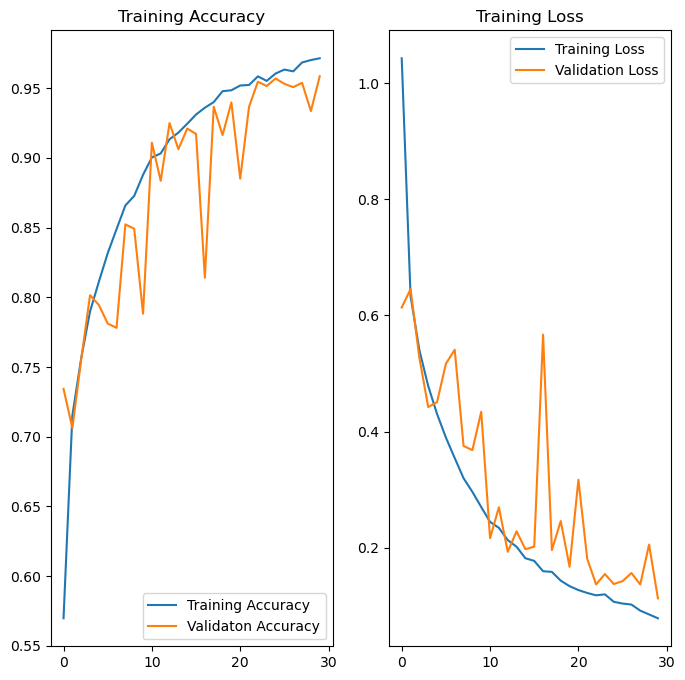

In [51]:
#Inspect training again

#We have overfitting for option 2 - training accuracy greater than validation accuracy 
#We reach a validation accuracy of 0.9586, higher than option 1 (extract, then train) 
#and again better than the small convnet trained from scratch

#However, there is a final technique called fine tuning, below

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validaton Accuracy')

plt.legend(loc='lower right')
plt.title('Training Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [40]:
#*************************************************************#
                         #Fine Tuning#
#*************************************************************#

#Another widely used technique: unfreezing a few of the top layers of a frozen model base

#'Fine-tuning' adjusts the more abstract representations of the pretrained model in order to 
#make them more relevant for the problem at hand

#It is only possible to fine-tune the top layers of the convolutional base once the classifier
#on top has already been trained

#Otherwise the error signal propagating back through the network would be too large and the 
#representations previously learned by the unfrozen conv layers would be destroyed

#We've already addresed the first 3 steps for fine tuning a network (see Section 9 intro on 
#tuning)

In [52]:
#Fine-tune the last 3 convolutional layers

#All layers up to block4_pool will be frozen

#block5_conv1, block5_conv2 and block5_conv3 will be trainable:

#Why not fine-tune more layers? Why not fine-tune the entire convolutional base?

#Earlier conv base layers encode generic features whilst higher layers encode more specialized features

#It is more useful to fine-tune the more specialized features - the generic festures 
#(edges, corners, colours etc) are expected to be present in any real-world image

#The convolutional base has XM parameters - a huge model with a very real chance of 
#overfitting. Another reason not to fine tune the entire base

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [53]:
#Freeze all but block 5 layers:

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [54]:
#We should limit the magnitude of modifications to the representations of the unfrozen layers.
#Use a tiny learning rate - large updates may damage these representations
#Let's go:

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      epochs=30,
      validation_data=validation_generator
)

Epoch 1/30


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == "":


512/512 [==============================] - 420s 818ms/step - loss: 16.7874 - acc: 0.3729 - val_loss: 0.7387 - val_acc: 0.6078
Epoch 2/30
512/512 [==============================] - 419s 819ms/step - loss: 0.7347 - acc: 0.6721 - val_loss: 0.5211 - val_acc: 0.7641
Epoch 3/30
512/512 [==============================] - 419s 818ms/step - loss: 0.5009 - acc: 0.7802 - val_loss: 0.3975 - val_acc: 0.8180
Epoch 4/30
512/512 [==============================] - 419s 818ms/step - loss: 0.4018 - acc: 0.8355 - val_loss: 0.4372 - val_acc: 0.8008
Epoch 5/30
512/512 [==============================] - 419s 819ms/step - loss: 0.3125 - acc: 0.8797 - val_loss: 0.2013 - val_acc: 0.9078
Epoch 6/30
512/512 [==============================] - 418s 817ms/step - loss: 0.2512 - acc: 0.9066 - val_loss: 0.2609 - val_acc: 0.8836
Epoch 7/30
512/512 [==============================] - 419s 819ms/step - loss: 0.2349 - acc: 0.9271 - val_loss: 0.4479 - val_acc: 0.8813
Epoch 8/30
512/512 [==============================] - 419s

In [55]:
model.save('predict_alzheimers_disease_using_CNN4.h5')

In [56]:
#*************************************************************#
                         #Batch Normalization#
#*************************************************************#

#Now train model with Batchnorm
#This is an additional layer that allows every layer of the network to do learning more
#independently. It's used to normalize the output of previous layers








checkpoint_filepath = '/kaggle/working/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(4, activation='softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


history_batch = model.fit_generator(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
    callbacks=[model_checkpoint_callback]
)


Epoch 1/30


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


512/512 [==============================] - 422s 822ms/step - loss: 0.0329 - acc: 0.9892 - val_loss: 0.0822 - val_acc: 0.9789
Epoch 2/30
512/512 [==============================] - 421s 822ms/step - loss: 0.0273 - acc: 0.9921 - val_loss: 0.2569 - val_acc: 0.9422
Epoch 3/30
512/512 [==============================] - 420s 821ms/step - loss: 0.0175 - acc: 0.9944 - val_loss: 0.0883 - val_acc: 0.9789
Epoch 4/30
512/512 [==============================] - 423s 826ms/step - loss: 0.0210 - acc: 0.9937 - val_loss: 0.0611 - val_acc: 0.9852
Epoch 5/30
512/512 [==============================] - 421s 822ms/step - loss: 0.0207 - acc: 0.9937 - val_loss: 0.1092 - val_acc: 0.9797
Epoch 6/30
512/512 [==============================] - 423s 826ms/step - loss: 0.0174 - acc: 0.9958 - val_loss: 0.0363 - val_acc: 0.9891
Epoch 7/30
512/512 [==============================] - 420s 821ms/step - loss: 0.0165 - acc: 0.9952 - val_loss: 0.1045 - val_acc: 0.9805
Epoch 8/30
512/512 [==============================] - 421s 

In [57]:
model.save('predict_alzheimers_disease_using_CNN4_batch.h5')

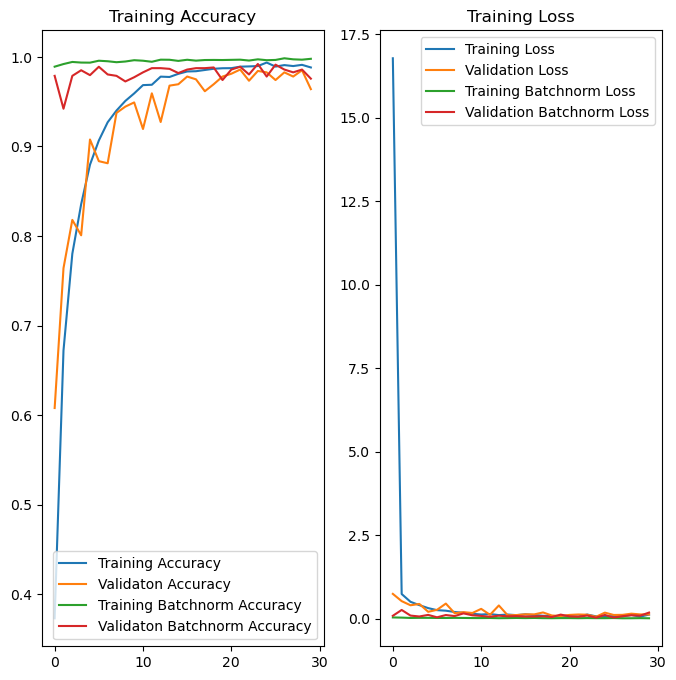

In [58]:
#Inspect training again

#It only just overfits
#We reach a validation accuracy of 0.9758, not as good as dropout, but better than all other models

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']


acc_batch = history_batch.history['acc']
val_acc_batch = history_batch.history['val_acc']

loss_batch = history_batch.history['loss']
val_loss_batch = history_batch.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validaton Accuracy')

plt.plot(epochs_range, acc_batch, label='Training Batchnorm Accuracy')
plt.plot(epochs_range, val_acc_batch, label='Validaton Batchnorm Accuracy')

plt.legend(loc='lower right')
plt.title('Training Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.plot(epochs_range, loss_batch, label='Training Batchnorm Loss')
plt.plot(epochs_range, val_loss_batch, label='Validation Batchnorm Loss')

plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()


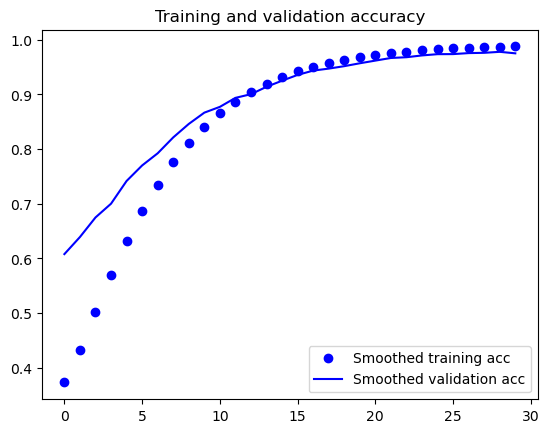

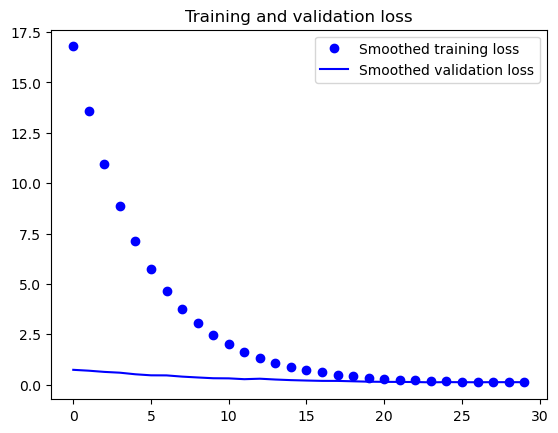

In [59]:
#The curves are smoother and more stable this time. 

#We might find that the average loss increases whilst accuracy improves. Accuracy depends on 
#the distribution of values and not the average

#labels (0, 0, 0, 1, 1, 1)
#output (0.0, 0.0, 0.6, 0.4, 0.0, 0.0): acc = X%, loss (MSE) =  2×0.366=0.12 
#output (0.4, 0.4, 0.4, 0.6, 0.6, 0.6): acc = Y%, loss (MSE) =  0.42=0.16 
#Accuracy has improved (X% to Y%) but loss has worsened (0.12 to 0.16)

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

epochs=range(30)

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 10. Evaluation 

Finally evaluate this model on the test data (ideally we should retrain on the merger of the training and the validation sets):

In [60]:
# Evaluate the best model which we found by fine tuning

test_generator = test_datagen.flow_from_directory(
        "/kaggle/input/smote-ds/new_output/test/",
        target_size=(128, 128),
        batch_size=20,
        class_mode='categorical',seed=42,shuffle=False)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1280 images belonging to 4 classes.
50/50 [==============================] - 29s 583ms/step - loss: 0.1397 - acc: 0.9770
test acc: 0.9769999980926514


In [61]:
y_pred=model.predict(test_generator)

64/64 [==============================] - 37s 570ms/step


In [62]:
y_pred=np.argmax(y_pred,axis=1)

In [63]:
y_true=test_generator.classes

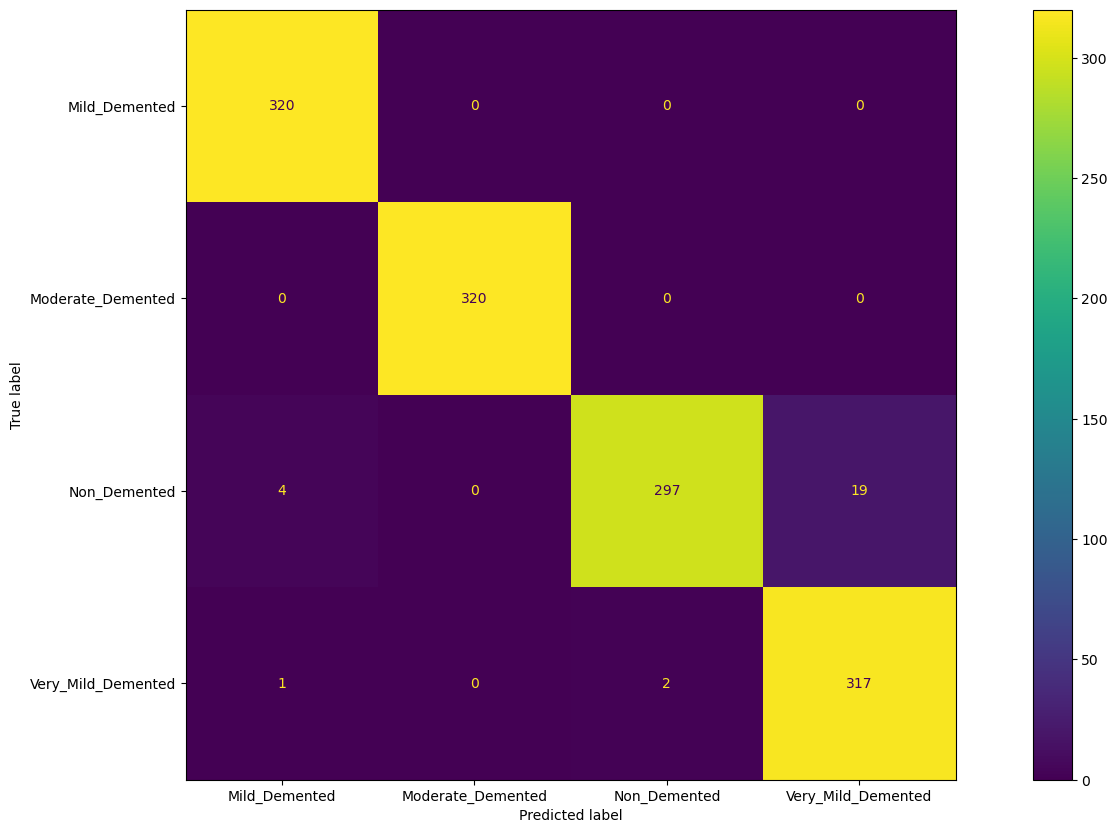

In [65]:

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Mild_Demented','Moderate_Demented','Non_Demented','Very_Mild_Demented'])
disp.plot()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## 11. Results

Our Baseline Performance (Section 7) helped us decide on a modelling strategy for a CNN. It's performance or validation accuracy was 0.9336, which was way above the expected default of 0.1000 for image classification.  However, as performance was generally weaker, we built a more complex, bigger, robust model in section 8 (Scaling Up - Developing a Model that Overfits).

In Section 8, we developed our overfitted model that produced a validation accuracy of 0.9742. This outperformed our baseline and is generally strong, however, this model can't generalize well - as could be seen from the Training and Validation Accuracy/Loss Plots. This means that our model will have a difficult time generalizing on a new dataset, hence we couldn't evaluate on the test set at that stage. Hence, we required to increase the overall performance of the model.

Such models can mitigate overfitting with fine tuning and the addition of dropout, detailed in Section 9 (Tuning and Regularization).  Hence, the best model for our data was found by using drop out. The pre-trained Convnet (VGG16) using Extract Then Train to increase prediction using feature extraction and Batch normalization produced very satisfactory results too.

**Summarising Validation Accuracy of all models above:**

1. Baseline model: 0.9336

2. Overfitted model: 0.9742 

3. Addition of dropout layer: 0.9945, no overfitting 

4. Option 1: Using a pre-trained convnet, Extract THEN train (using feature extraction): 0.8453, no overfitting

5. Option 2: Using a Pre-Trained convnet, Extract AND train: 0.9586, but overfits 

6. Fine tuning (fine tune last 3 convolutional layers - freeze all other layers): 0.9641, slightly overfitting

7. Addition of batch normalization using option 2: 09758, slightly overfitting


**Summarising our Confusion Matrix above:**

1. For the 'Mild Demented' MRI images, the classifier correctly predicted 320 of them. However, 4 images were incorrectly predicted as 'Non Demented' and 1 image incorrectly predicted as 'Very Mild Demented'

2. For the 'Moderate Demented' MRI images, the classifier correctly predicted all 320 of them. Hence, the network recognizing 100% of the 'Moderate Demented' MRI images.

3. For the 'Non Demented' MRI images, the classifier correctly predicted 297 of them. However, 2 images were incorrectly predicted as 'Very Mild Demented'

4. For the 'Very Mild Demented' MRI images, the classifier correctly predicted 317 of them. However, 19 images were incorrectly predicted as 'Non Demented' 

**Evaluation/ Test Set**

In Section 10 (Evaluation), we finally evaluated our data with our holdout set (unused test images). There is a very minuscule performance drop when testing new samples/ MRI images.  The test set was 0.9770, very similar to our best validation set ie. 0.9945 (for dropout). And also very similar when we incorporated batch normalization i.e. 0.9758  

Additionally, there is a minuscule gap on the losses and accuracies between these forementioned train and validation evaluations. Where there's no overfitting for the dropout technique, no overfitting for the pre-trained convnet (Option 1) and only slight overfitting for batch normalization.

As the test set performance is very close to the validation set performance, it indicates the validation/ evaluation procedure was reliable and very little information was leaked.  


## Generative Model (DCGAN)


Medical image analysis is an important application of deep learning, which is expected to greatly reduce the workload of doctors, contributing to more sustainable health systems. However, most current AI methods for medical image analysis are based on supervised learning, which requires a lot of annotated data. The number of medical images available is usually small and the acquisition of medical image annotations is an expensive process (such as our dataset). 

Generative models,such as Generative adversarial networks (GAN), an unsupervised method that has become very popular in recent years, can simulate the distribution of real data and reconstruct approximate real data. GAN opens some exciting new ways for medical image generation, expanding the number of medical images available for deep learning methods [13]

Tranformers were taken into consideration for this coursework, however, they require huge amounts of data to learn everything from scratch. Hence, they are deemed unsuitable for our small dataset.

Unlike other deep learning neural network models that are trained with a loss function until convergence, a GAN generator model is trained using a second model called a discriminator that learns to classify images as real or generated. Both the generator and discriminator model (two neural networks) are trained together to maintain an equilibrium.  Both Generator and Discriminator use Batch Normalization, but don't use max pooling.

As such, there is no objective loss function used to train the GAN generator models and no way to objectively assess the progress of the training and the relative or absolute quality of the model from loss alone [17] 


In [66]:
#For code,refer to reference 14.  Our DCGAN model is based on this tutorial  

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [67]:
# Now we should load RGB images instead of grayscale  
#",color_mode='grayscale'" is not needed any more

BATCH_SIZE=256
target_size=(28,28)
train_datagen = ImageDataGenerator(
      rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        "/kaggle/input/output-dc-gan2/output_dc_gan/train",
        # All images will be resized to 150x150
        target_size=target_size,
        batch_size=BATCH_SIZE,
       
        class_mode='categorical',color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
        "/kaggle/input/output-dc-gan2/output_dc_gan/val",
        target_size=target_size,
        batch_size=BATCH_SIZE,
        class_mode='categorical',color_mode='grayscale')


test_generator = test_datagen.flow_from_directory(
        "/kaggle/input/output-dc-gan2/output_dc_gan/test",
        target_size=target_size,
        batch_size=BATCH_SIZE,
        class_mode='categorical',seed=42,shuffle=False,color_mode='grayscale')

Found 10240 images belonging to 1 classes.
Found 1280 images belonging to 1 classes.
Found 1280 images belonging to 1 classes.


In [68]:
#We pass some random noise to the Generator.  The random noise is upscaled using 
#'Conv2DTranspose'. Conv2Dtranspose is used to transform a vector going in the opposite direction
#of a normal convolution

#LeakyReLU allows the gradients to flow better through the model architecture

#Refer to reference 15 for more background

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model
#     model = tf.keras.Sequential()

#     # Input layer
#     model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     # Reshape to 7x7x256
#     model.add(layers.Reshape((7, 7, 256)))
#     assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

#     # Upsample to 14x14x128
#     model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     # Upsample to 28x28x64
#     model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     # Upsample to 56x56x32
#     model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     # Upsample to 112x112x16
#     model.add(layers.Conv2DTranspose(16, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

    
#     # Upsample to 128x128x1
#     model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='valid', use_bias=False, activation='tanh'))
#     #print(model.output_shape)
#     assert model.output_shape == (None, 116, 116, 1)
    
#     return model

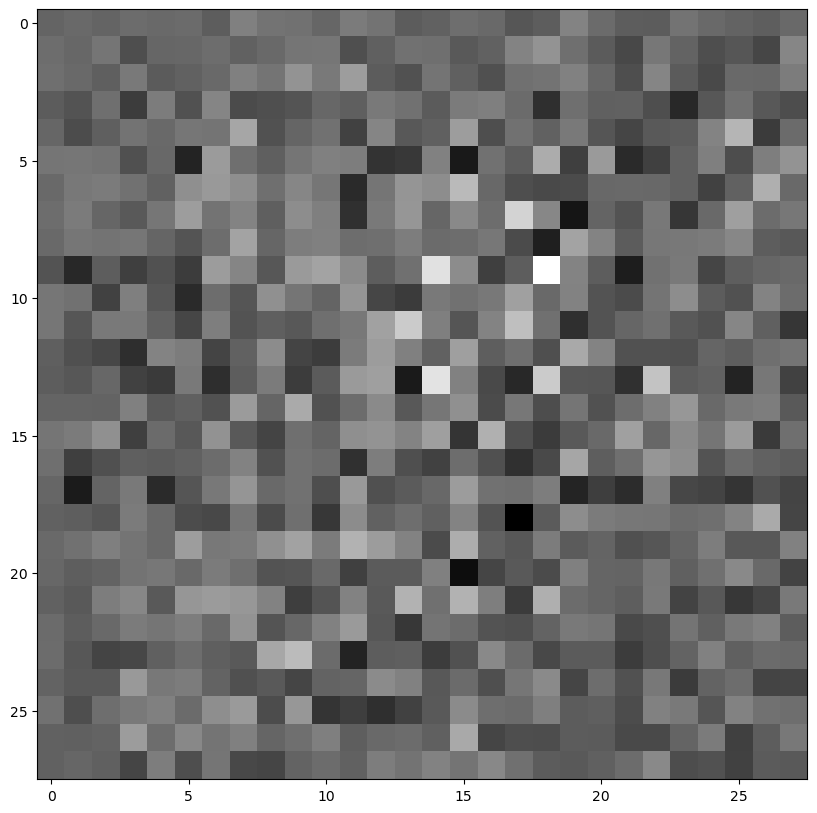

In [69]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [70]:
#The Discriminator is an image classification model that classifies between the real and
#fake image. It takes fake images generated from the Generator, using random noise and the
#real images from the training dataset as an input to classify

#Refer to reference 15 for more background


def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model


In [71]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00098837]], shape=(1, 1), dtype=float32)


In [72]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [73]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [74]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [75]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [76]:
checkpoint_dir = '/kaggle/working/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [77]:
real_image=train_generator[0][0][0]
gen_image=np.array(generated_image[0])
gen_image=np.repeat(gen_image, 3, axis=2)
real_image=np.repeat(real_image, 3, axis=2)

In [78]:
#Peak Signal-to- Noise Ratio (PSNR) is used to quantify the similarity between two images and 
#is used for benchmarking super resolution models.

#The higher the PSNR, the better the quality of the compressed, or reconstructed image.
#Refer to reference 16 for more background

def get_psnr(real, generated):
    psnr_value=tf.reduce_mean(tf.image.psnr(generated, real, max_val=256.0))
    return psnr_value

In [79]:
psnr=float(get_psnr(real_image, gen_image))
print(psnr)

55.420509338378906


In [85]:
EPOCHS = 125
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [86]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [87]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    i=0
    #steps_per_epoch = len(dataset.filenames) // BATCH_SIZE + 1
    steps_per_epoch = 1280 // BATCH_SIZE + 1
    for image_batch in dataset:
      
      train_step(image_batch[0])
      i=i+1
      if i >= steps_per_epoch:  # manually detect the end of the epoch
            break   
    print('epoch=',epoch)
    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [88]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

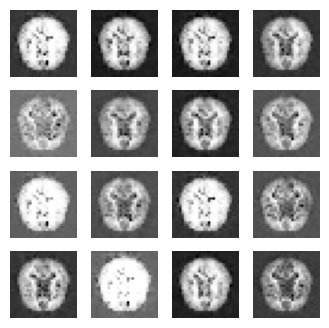

In [89]:
#EPOCHS=125
#As this process is computationally expensive, we can only run 125 epochs
#We'll potentially obtain higher resolutiom MRI images with an increase of epochs
#BATCH_SIZE=256
train(train_generator, EPOCHS)

## 12. Conclusions

There's a fine balance between optimization of training data and generalization i.e. fine tuning v overfitting.

We can mitigate overfitting with a one or two hidden layer network if our dataset is small. However, in most of our cases, we have eleven dense layers and a bigger sized dataset, after SMOTE was applied from Part 1. Not overly complex, however, overfitting and tuning was addressed with:

- Adding dropout
- Using a pre-trained Convnet, trained on Imagenet (VGG16)
- Fine Tuning 
- Feature Extraction
- Adding batch normalization

Overfitting can also be addressed with Data augmentation too, however, as stated above, we already balanced the data with SMOTE from Part 1 [20]

Overall, we produced a neural network (CNN) that can predict what stage of Alzheimer's a patient is, from the MRI image of their brain. Our final model (in Section 10 - Evaluation) or test set had an accuracy of 0.9770, which is a satisfactory predictor or classifier of MRI images for alzheimer patients.

There's a little bit of uncertainty during the early stage predictions (as seen from the confusion matrix above), as 19 very mild demented MRI images were identified as non demented i.e 19 false positives. This is of course a misleading and concerning diagnosis for medical image classification and healthcare. More CNN models should be developed in the long term and fine tuned to deal with and minimise these false positives.

**Generative Model (DCGAN)**

We also trialled a Generative model, a DCGAN.  At present, medical image generation has proven to be visually effective, but the quality of generated images still uses traditional evaluation indexes, such PSNR (55.4 in our case). However, these evaluation indexes are not objective enough to evaluate the quality of medical image generation. 

The interpretation of an image may also affect the life of the patient, so many technologies that are good in other areas for similar purposes may not be applicable in this medical field. Sometimes even a normal medical image will not be given enough trust by doctors, and multi-level detection is still needed. In this context, currently there is no reason for doctors to give trust to images generated by GAN or DCGAN.  Additionaly, the quality of existing medical datasets is spotty, and some are old and scattered. For some tasks, such as the transformation between MRI and CT images, it is difficult to find relevant images of a certain scale. Most researchers collect them by themselves through hospitals which is very time consuming [13]

*Future Research*

When fully deployed and fine tuned, this neural network (CNN) could be utilised as a second opinion in a healthcare environment, where healthcare staff are overworked and patients face a huge backlog in screenings/ appointments [19].  

Thus, our CNN model is suitable and deemed fit for predicting the latter stages of alzheimers disease.

### References:

1.Alzheimers Society, United Against Dementia - Alzheimer's disease
https://www.alzheimers.org.uk/about-dementia/types-dementia/alzheimers-disease

2.Detection of Alzheimers Disease from MRI using Convolutional Neural Networks, Exploring Transfer Learning And BellCNN
https://arxiv.org/pdf/1901.10231.pdf

3.Alzheimer’s Disease – Why We Need Early Diagnosis
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6935598/

4.Brain Imaging in Alzheimer Disease
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3312396/

5.Early Detection of Alzheimer’s Disease Using Magnetic Resonance Imaging: A Novel Approach Combining Convolutional Neural Networks and Ensemble Learning
https://www.frontiersin.org/articles/10.3389/fnins.2020.00259/full

6.Alzheimer's Disease Brain Comparison, illustrated by Evan Oto
https://www.alamy.com/alzheimers-disease-brain-comparison-image353184441.html?imageid=D1C13FD4-68AB-40B0-BED5-C57FAB65068C&p=307549&pn=1&searchId=63fa9b7cef7efb165bf4f1d361fe84fa&searchtype=0

7.Alzheimer MRI Preprocessed Dataset
https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset

8.How to train neural networks for image classification — Part 2
https://sandy-lee.medium.com/how-to-train-neural-networks-for-image-classification-part-2-c9935445c562

9.Deep Learning with Python (Francois Chollet), Chapter 4.4 (Overfitting and Underfitting)

10.Deep Learning with Python (Francois Chollet), Part 2, Chapter 5 (Deep learning for computer vision)

11.Evaluating Machine Learning Models 
https://medium.datadriveninvestor.com/evaluating-machine-learning-models-8e2193c2b237

12.Deep Learning with Python (Francois Chollet), Chapter 4 (Fundamentals of Machine Learning)

13.When medical images meet generative adversarial network: recent development and research opportunities
https://link.springer.com/article/10.1007/s44163-021-00006-0

14.Deep Convolutional Generative Adversarial Network - Tutorial
https://www.tensorflow.org/tutorials/generative/dcgan

15.DCGAN: Deep Convolutional Generarative Adverisial Network
https://medium.com/swlh/dcgan-deep-convolutional-generative-adversarial-network-1a2e55c35133#:~:text=DCGAN%20is%20used%20to%20generate,get%20better%20at%20the%20game.

16.Our Summer of Code Project on TF-GAN (Evaluation metric for DCGAN)
https://blog.tensorflow.org/2022/01/summer-of-code.html

17.How to Evaluate Generative Adversarial Networks
https://machinelearningmastery.com/how-to-evaluate-generative-adversarial-networks/

18.Deep Learning with Python (Francois Chollet), Chapter 8.5 (Introduction to Generative Adversial Networks)

19.Health and Social Care Committee: Clearing the backlog caused by the pandemic - Alzheimer's Society responds
https://www.alzheimers.org.uk/news/2022-01-06/health-social-care-committee-backlog-caused-coronavirus-dementia

20.HealthyData - Neural Networks - Prediction of Alzheimers Disease - Part 1
